https://github.com/pideyi1025/DeepLabV3Plus-RailSem19/blob/main/preprocess.py

In [2]:
import os
import cv2
import numpy as np
import glob
import shutil 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from skimage.color import rgb2gray
# import numpy as np
# from matplotlib import pyplot as plt
# from patchify import patchify
# import tifffile as tiff
# from PIL import Image
# import tensorflow as tf
# from tensorflow import keras
# import segmentation_models as sm
# from tensorflow.keras.metrics import MeanIoU
# import random


(1080, 1920, 3)

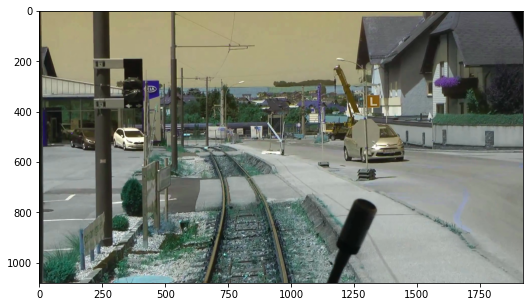

In [3]:
#Quick understanding of the dataset
temp_img = cv2.imread('rs19_val/jpgs/rs19_val/rs03179.jpg') #3 channels / spectral bands
plt.figure(figsize = (10,5))
plt.imshow(temp_img[:,:,:])
temp_img.shape # it is three-channel image(RGB)

In [20]:
from basic_image_eda import BasicImageEDA

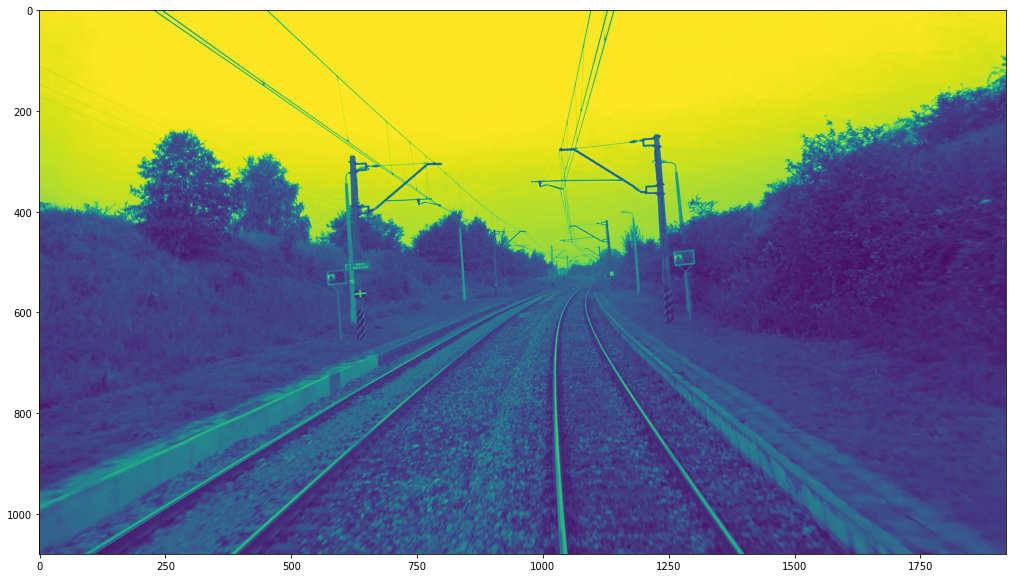

In [16]:
#Quick understanding of the dataset
temp_img = cv2.imread('rs19_val/jpgs/rs19_val/rs08171.jpg') #3 channels / spectral bands
plt.figure(figsize = (20,10))
plt.imshow(temp_img[:,:,0]) #View each channel...

In [4]:
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs08171.png') #3 channels but all same. 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

Labels are:  [ 1  5  7  8  9 10 12 15 17]  and the counts are:  [ 87902  26120   3233 407270 447899 653323 157262 247332  43259]


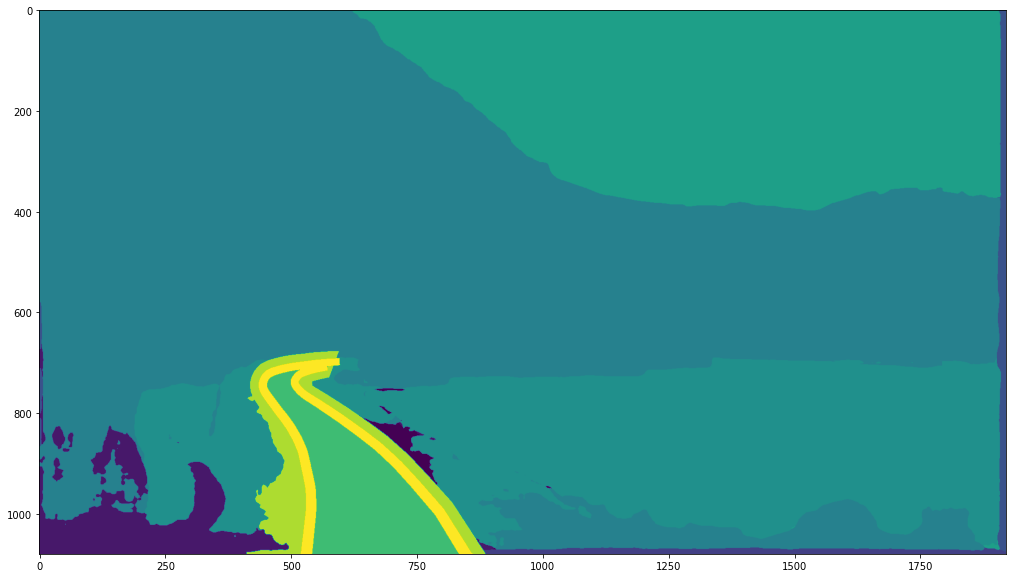

In [18]:
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs00016.png')
plt.figure(figsize = (20,10))
plt.imshow(temp_mask[:,:,0]) 

In [9]:
temp_mask.shape

(1080, 1920, 3)

In [10]:
#check which labels are in the image
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs08171.png') 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) 
labels

array([ 1,  5,  7,  8,  9, 10, 12, 15, 17], dtype=uint8)

In [11]:
CLASSES = ['road',
        'sidewalk',
        'construction',
        'tram-track',
        'fence',
        'pole',
        'traffic-light',
        'traffic-sign',
        'vegetation',
        'terrain',
        'sky',
        'human',
        'rail-track',
        'car',
        'truck',
        'trackbed',
        'on-rails',
        'rail-raised',
        'rail-embedded']

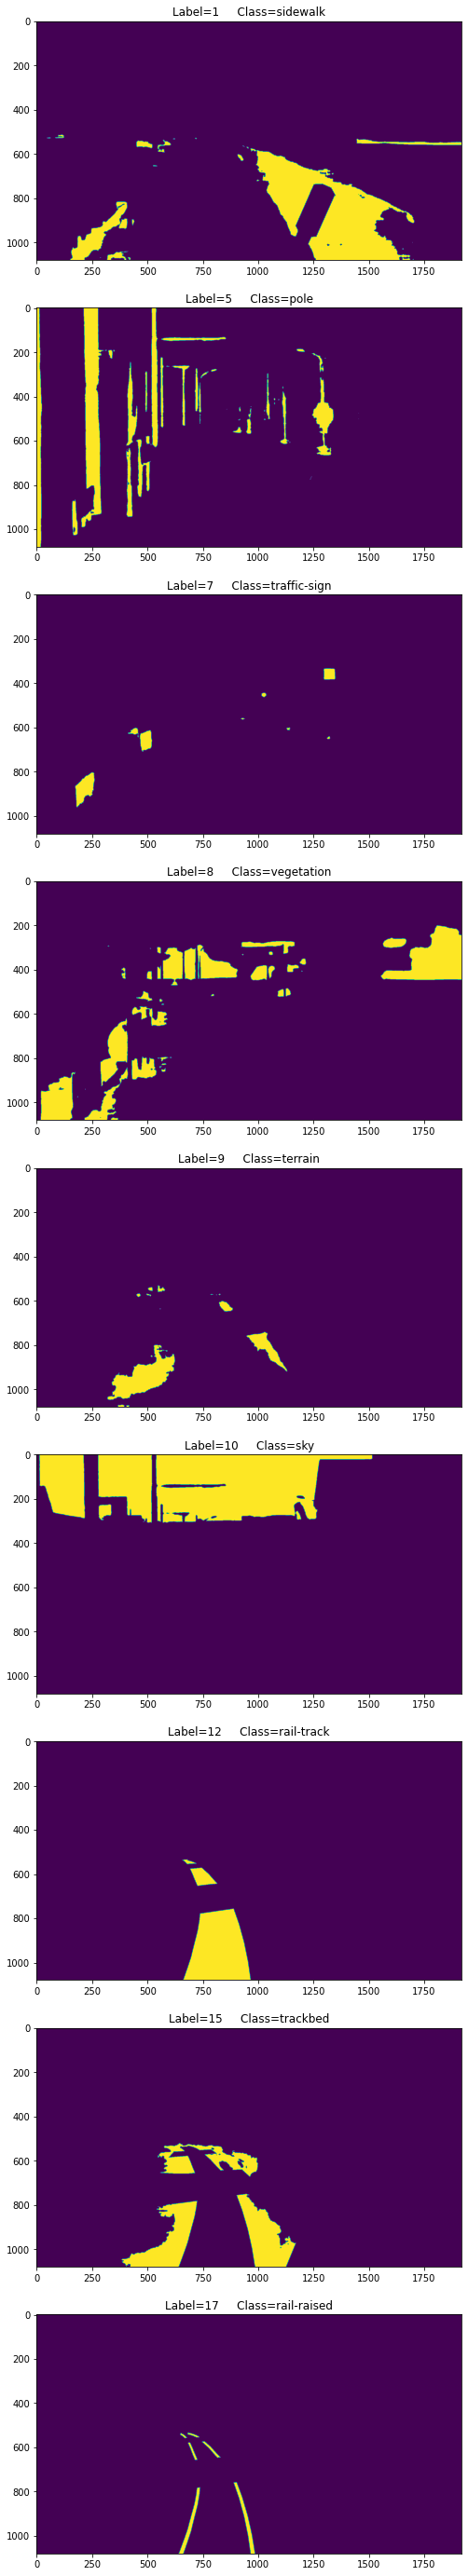

In [25]:
#print one image per label class
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 ) = plt.subplots(9, figsize=(100,50))
cls = 0
for  ax in fig.get_axes():
    temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs03179.png') 
    #this means that if the pixel labels are NOT the ones we care, make them all ZERO
    temp_mask[:,:,0][temp_mask[:,:,0]!=labels[cls]]=0
    ax.imshow(temp_mask[:,:,0]) 
    ax.title.set_text(f'Label={labels[cls]}     Class={CLASSES[labels[cls]]}')
    cls+= 1

# Deal with the json

In [20]:
import json

In [21]:
with open('rs19_val/jsons/rs19_val/rs07129.json') as json_file:
    data = json.load(json_file)
data['objects']

[{'boundingbox': [891, 424, 923, 430], 'label': 'switch-left'},
 {'boundingbox': [969, 414, 988, 417], 'label': 'switch-right'},
 {'boundingbox': [798, 129, 832, 197], 'label': 'track-signal-front'},
 {'boundingbox': [1135, 148, 1180, 228], 'label': 'track-signal-front'},
 {'boundingbox': [799, 221, 836, 278], 'label': 'track-signal-front'},
 {'boundingbox': [1130, 250, 1169, 307], 'label': 'track-signal-front'},
 {'boundingbox': [814, 383, 828, 476], 'label': 'track-sign-front'},
 {'boundingbox': [1054, 538, 1090, 556], 'label': 'switch-static'},
 {'boundingbox': [1133, 405, 1148, 498], 'label': 'track-sign-front'},
 {'boundingbox': [1060, 437, 1079, 456], 'label': 'track-sign-front'},
 {'label': 'pole',
  'polygon': [[807, 539],
   [808, 535],
   [812, 531],
   [812, 479],
   [812, 440],
   [813, 326],
   [813, 277],
   [805, 278],
   [800, 275],
   [798, 264],
   [800, 222],
   [807, 220],
   [807, 220],
   [813, 220],
   [813, 204],
   [802, 200],
   [797, 155],
   [799, 134],
   [

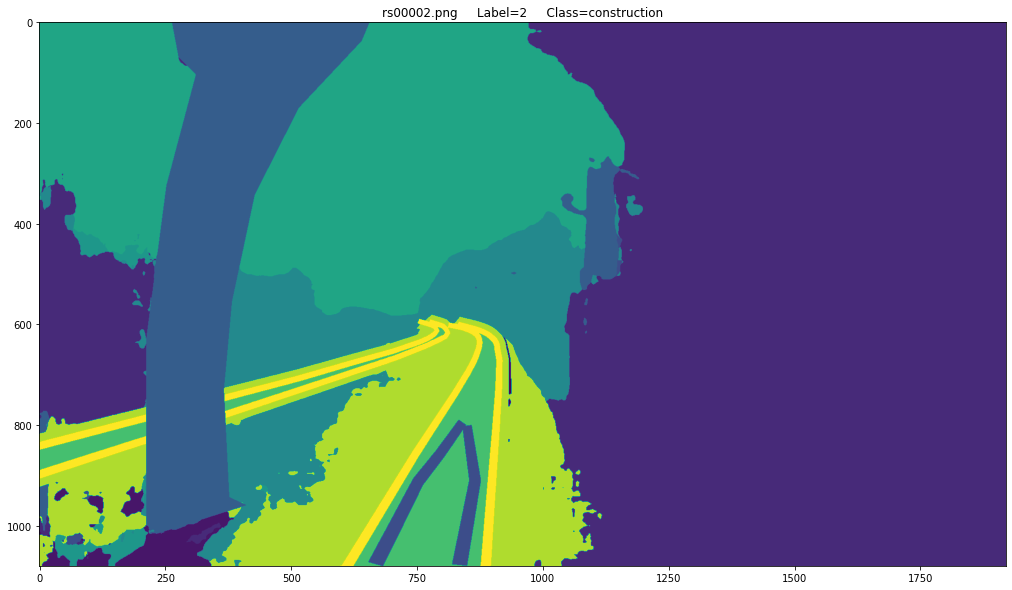

In [22]:
#these codes are used to loop through the directory
fig, ax = plt.subplots(1, figsize=(20,10))
cls = 0

path_images = 'rs19_val/uint8/rs19_val'
i=0
for filename in os.listdir(path_images):
    if filename.endswith('.png'):    
        temp_mask = cv2.imread('rs19_val/uint8/rs19_val/'+filename) 
        temp_mask[:,:,0][temp_mask[:,:,0]!=4]=0
        ax.imshow(temp_mask[:,:,0]) 
        ax.imshow(temp_mask[:,:,1]) 
        ax.imshow(temp_mask[:,:,2]) 
        ax.title.set_text(f'{filename}     Label={cls}     Class={CLASSES[cls]}')
        cls+= 1
    if cls == 3:
        break


# Check only veg

Labels are:  [ 1  5  7  8  9 10 12 15 17]  and the counts are:  [ 87902  26120   3233 407270 447899 653323 157262 247332  43259]


'\nrs00016\nrs00089\nrs00097\n\nrs00102 -> 8\n'

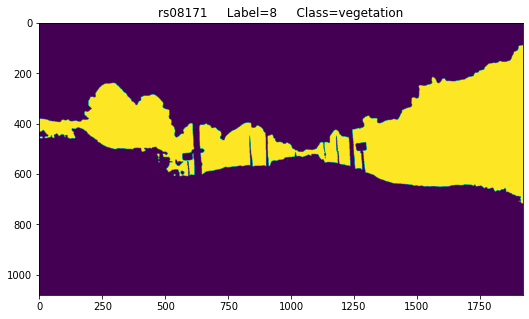

In [23]:
fig, ax = plt.subplots(1, figsize=(10,5))


path = 'rs19_val/uint8/rs19_val/'
filename = 'rs08171'
temp_mask = cv2.imread(path+filename+'.png') 


labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

temp_mask[:,:,0][temp_mask[:,:,0]!=8]=0

ax.imshow(temp_mask[:,:,0]) 
ax.title.set_text(f'{filename}     Label={8}     Class={CLASSES[8]}')



"""
rs00016
rs00089
rs00097

rs00102 -> 8
"""

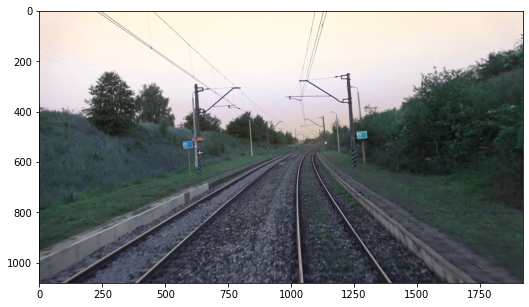

In [ ]:
path = 'rs19_val/jpgs/rs19_val/'
fig, ax = plt.subplots(1, figsize=(10,5))
temp_img = cv2.imread(path+filename+'.jpg') 
ax.imshow(temp_img[:,:,:]) 